In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("ravi24")

In [3]:
df

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Hyundai,961000,879000,Petrol,Manual,2019,28943,1st,4614,175800,Ahmedabad,Medium
1,Hyundai,933000,896000,Petrol,Automatic,2016,52287,1st,9666,179200,Ahmedabad,Medium
2,Toyota,418000,388000,Diesel,Manual,2015,99046,2nd,5713,77600,Ahmedabad,Low
3,Honda,766000,697000,Petrol,Manual,2017,104509,1st,4254,139400,Ahmedabad,Medium
4,Hyundai,590000,579000,Diesel,Manual,2016,52228,2nd,3771,115800,Ahmedabad,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
435,Maruti,210000,210000,Petrol,Manual,2012,58638,2nd,3284,42000,Vadodara,Low
436,Volkswagen,501000,488000,Petrol,Manual,2018,53188,1st,10510,97600,Vadodara,Medium
437,Hyundai,298000,292000,Petrol,Manual,2017,86094,1st,8852,58400,Vadodara,Low
438,Maruti,240000,234000,Petrol,Manual,2013,25961,1st,5896,46800,Vadodara,Low


In [26]:
original_3=df["Original_Price"].quantile(0.75)
original_1=df["Original_Price"].quantile(0.25)
original_iqr=original_3-original_1

left_original=max(df["Original_Price"].min(),original_1-1.5*original_iqr)
right_original=min(df["Original_Price"].max(),original_3+1.5*original_iqr)

In [35]:
original_outliers=df[df['Original_Price']>right_original]
original_outliers["Original_Price"]


16     1312000
25     1218000
37     1734000
61     1373000
90     1800000
114    1569000
116    1178000
176    1901000
296    1334000
332    1602000
381    1534000
408    2297000
Name: Original_Price, dtype: int64

In [36]:
original_without=df[df["Original_Price"]<right_original]

In [37]:
original_without["Original_Price"].describe()

count    4.280000e+02
mean     4.887011e+05
std      2.190795e+05
min      1.440000e+05
25%      3.080000e+05
50%      4.560000e+05
75%      6.400000e+05
max      1.166000e+06
Name: Original_Price, dtype: float64

In [38]:
emi_3=df["EMI(per/month)"].quantile(0.75)
emi_1=df["EMI(per/month)"].quantile(0.25)
emi_iqr=emi_3-emi_1

left_emi=max(df["EMI(per/month)"].min(),emi_1-1.5*emi_iqr)
right_emi=min(df["EMI(per/month)"].max(),emi_3+1.5*emi_iqr)

In [39]:
emi_outliers=df[df["EMI(per/month)"]>right_emi]
emi_outliers["EMI(per/month)"]


36     22171
98     20602
121    19552
138    17755
298    17648
316    16933
339    23465
379    20450
385    24744
390    25247
414    33713
434    23069
Name: EMI(per/month), dtype: int64

In [40]:
emi_without=df[df["EMI(per/month)"]<right_emi]

In [41]:
emi_without["EMI(per/month)"].describe()

count      428.000000
mean      7266.240654
std       3073.951174
min       2018.000000
25%       4747.000000
50%       6803.000000
75%       9306.000000
max      16476.000000
Name: EMI(per/month), dtype: float64

In [47]:
offer_3=df["Original_Price"].quantile(0.75)
offer_1=df["Original_Price"].quantile(0.25)
offer_iqr=original_3-original_1

left_offer=max(df["Offer_Price"].min(),offer_1-1.5*offer_iqr)
right_offer=min(df["Offer_Price"].max(),offer_3+1.5*offer_iqr)

In [48]:
offer_outliers=df[df['Offer_Price']>right_original]
offer_outliers["Offer_Price"]

25     1218000
37     1734000
61     1373000
90     1800000
114    1521000
176    1828000
296    1282000
332    1541000
381    1445000
408    2214000
Name: Offer_Price, dtype: int64

In [49]:
offer_without=df[df["Offer_Price"]<right_offer]

In [50]:
offer_without["Offer_Price"].describe()

count    4.300000e+02
mean     4.561181e+05
std      2.124206e+05
min      1.290000e+05
25%      2.870000e+05
50%      4.205000e+05
75%      5.810000e+05
max      1.172000e+06
Name: Offer_Price, dtype: float64

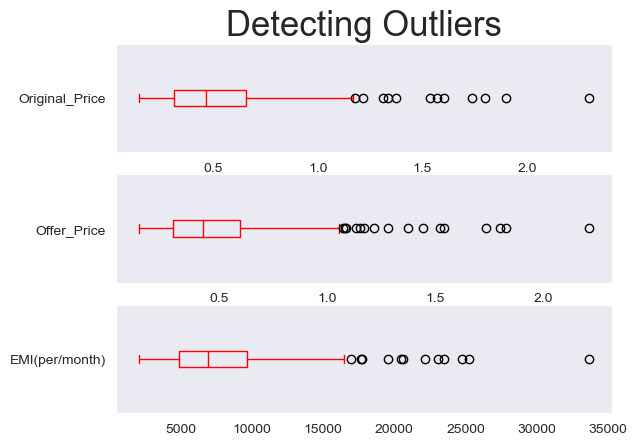

In [46]:
plt.subplot(3,1,1)
df["Original_Price"].plot(kind='box',color='red',vert=False)
plt.title('Detecting Outliers', fontsize=25)

plt.subplot(3,1,2)
df["Offer_Price"].plot(kind='box',color='red',vert=False)

plt.subplot(3,1,3)
df["EMI(per/month)"].plot(kind='box',color='red',vert=False)

plt.show()

    

# UNI - Variate 

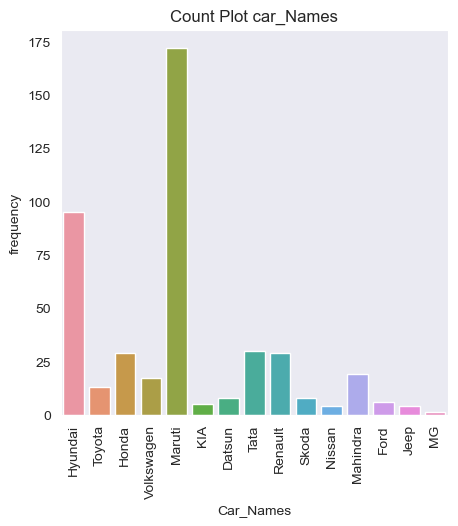

In [55]:
plt.figure(figsize=(5,5))
sns.countplot(x=df["Name_of_Car"],data=df)
plt.xticks(rotation=90)
plt.xlabel('Car_Names')
plt.ylabel('frequency')
plt.title('Count Plot car_Names')
plt.show()


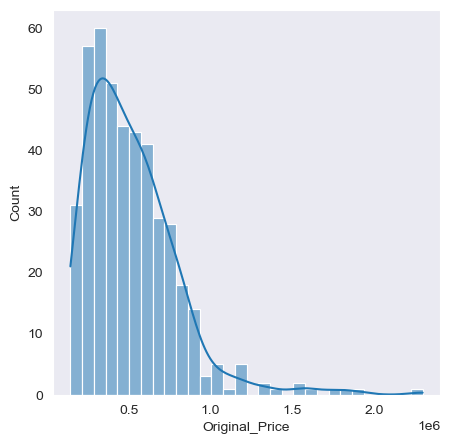

In [62]:
plt.figure(figsize=(5,5))
sns.histplot(x=df["Original_Price"],bins=30,kde=True)
plt.show()


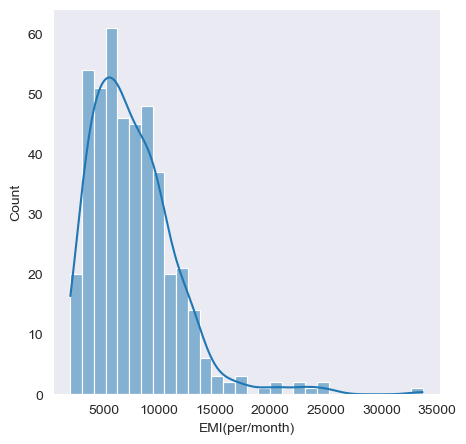

In [63]:
plt.figure(figsize=(5,5))
sns.histplot(x=df["EMI(per/month)"],bins=30,kde=True)
plt.show()


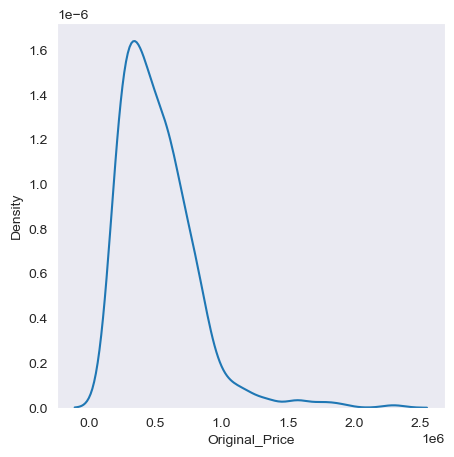

In [77]:
plt.figure(figsize=(5,5))
sns.kdeplot(df["Original_Price"]) # bind = no. of bars in plots
plt.show()

In [78]:
df.head()

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Hyundai,961000,879000,Petrol,Manual,2019,28943,1st,4614,175800,Ahmedabad,Medium
1,Hyundai,933000,896000,Petrol,Automatic,2016,52287,1st,9666,179200,Ahmedabad,Medium
2,Toyota,418000,388000,Diesel,Manual,2015,99046,2nd,5713,77600,Ahmedabad,Low
3,Honda,766000,697000,Petrol,Manual,2017,104509,1st,4254,139400,Ahmedabad,Medium
4,Hyundai,590000,579000,Diesel,Manual,2016,52228,2nd,3771,115800,Ahmedabad,Medium


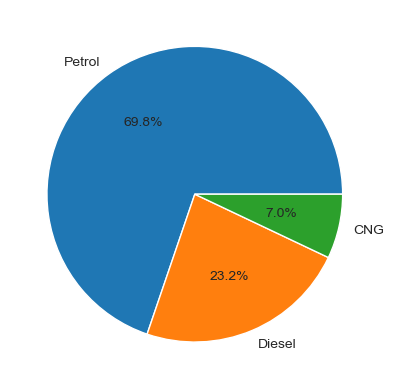

In [96]:
plt.pie(df["Type_of_Fuel"].value_counts(),labels=df["Type_of_Fuel"].unique(),autopct="%.1f%%")
plt.show()

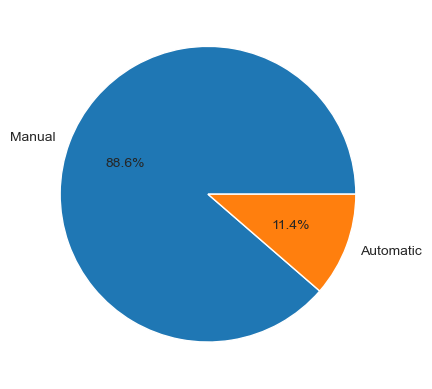

In [95]:
plt.pie(df["Ride"].value_counts(),labels=df["Ride"].unique(),autopct="%.1f%%")
plt.show()

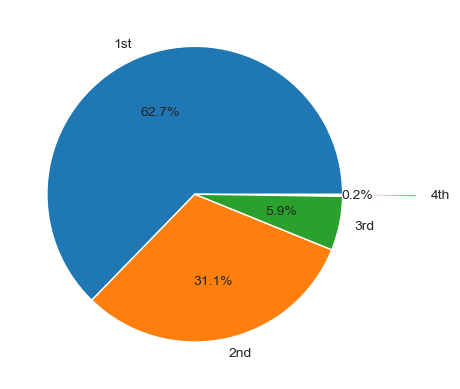

In [99]:
plt.pie(df["car_type"].value_counts(),labels=df["car_type"].value_counts().index,autopct="%.1f%%",explode=[0,0,0,0.5])
plt.show()

In [91]:
df["car_type"].value_counts()

1st    276
2nd    137
3rd     26
4th      1
Name: car_type, dtype: int64

In [100]:
df

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Hyundai,961000,879000,Petrol,Manual,2019,28943,1st,4614,175800,Ahmedabad,Medium
1,Hyundai,933000,896000,Petrol,Automatic,2016,52287,1st,9666,179200,Ahmedabad,Medium
2,Toyota,418000,388000,Diesel,Manual,2015,99046,2nd,5713,77600,Ahmedabad,Low
3,Honda,766000,697000,Petrol,Manual,2017,104509,1st,4254,139400,Ahmedabad,Medium
4,Hyundai,590000,579000,Diesel,Manual,2016,52228,2nd,3771,115800,Ahmedabad,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
435,Maruti,210000,210000,Petrol,Manual,2012,58638,2nd,3284,42000,Vadodara,Low
436,Volkswagen,501000,488000,Petrol,Manual,2018,53188,1st,10510,97600,Vadodara,Medium
437,Hyundai,298000,292000,Petrol,Manual,2017,86094,1st,8852,58400,Vadodara,Low
438,Maruti,240000,234000,Petrol,Manual,2013,25961,1st,5896,46800,Vadodara,Low


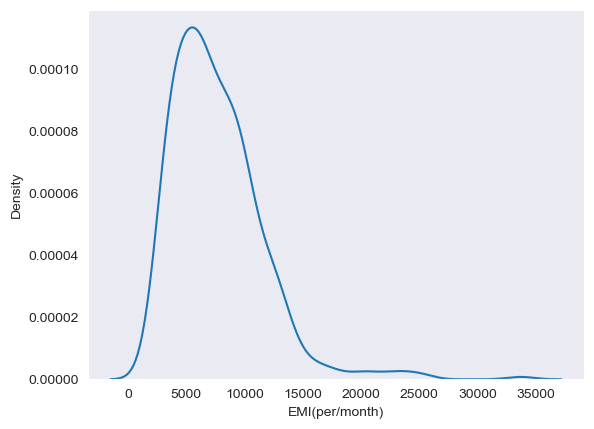

In [105]:
sns.kdeplot(x=df['EMI(per/month)'])
plt.show()

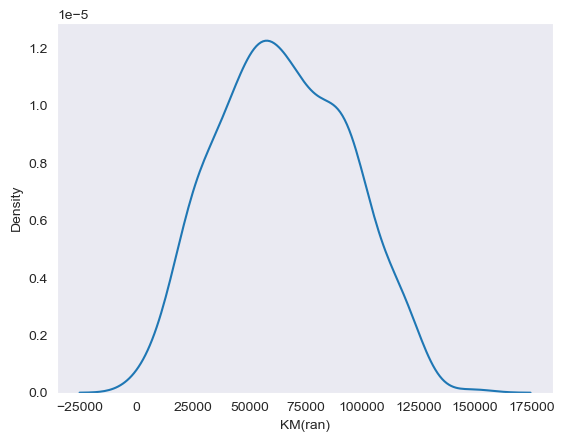

In [106]:
sns.kdeplot(x=df['KM(ran)'])
plt.show()

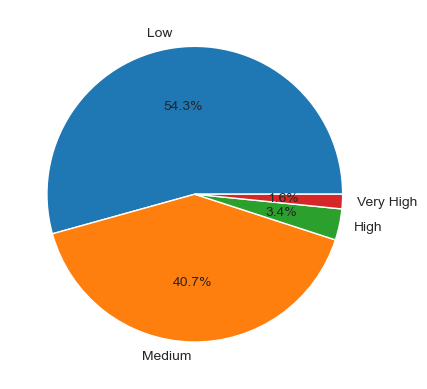

In [108]:
plt.pie(df["Price_level"].value_counts(),labels=df["Price_level"].value_counts().index,autopct="%.1f%%")
plt.show()

In [4]:
df.head()

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Hyundai,961000,879000,Petrol,Manual,2019,28943,1st,4614,175800,Ahmedabad,Medium
1,Hyundai,933000,896000,Petrol,Automatic,2016,52287,1st,9666,179200,Ahmedabad,Medium
2,Toyota,418000,388000,Diesel,Manual,2015,99046,2nd,5713,77600,Ahmedabad,Low
3,Honda,766000,697000,Petrol,Manual,2017,104509,1st,4254,139400,Ahmedabad,Medium
4,Hyundai,590000,579000,Diesel,Manual,2016,52228,2nd,3771,115800,Ahmedabad,Medium


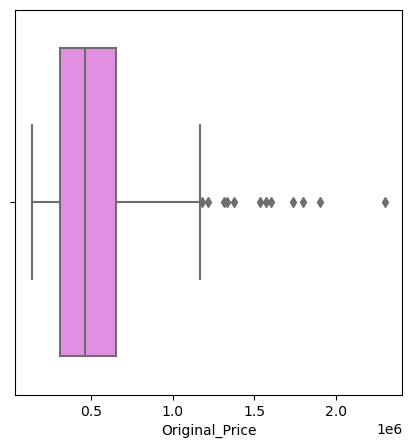

In [6]:
plt.figure(figsize=(5,5))
sns.boxplot(x=df["Original_Price"],color='violet')
plt.show()

## BI - Variate

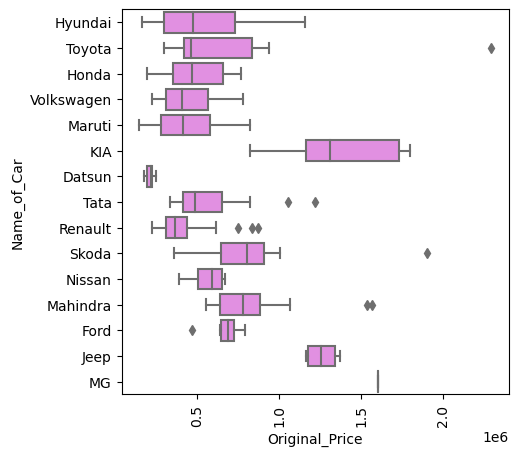

In [4]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Original_Price',y='Name_of_Car',data=df,color='violet')
plt.xticks(rotation=90)
plt.show()

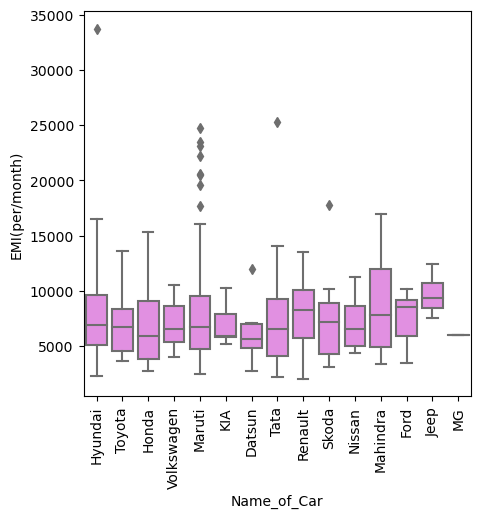

In [6]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Name_of_Car',y='EMI(per/month)',data=df,color='violet')
plt.xticks(rotation=90)
plt.show()

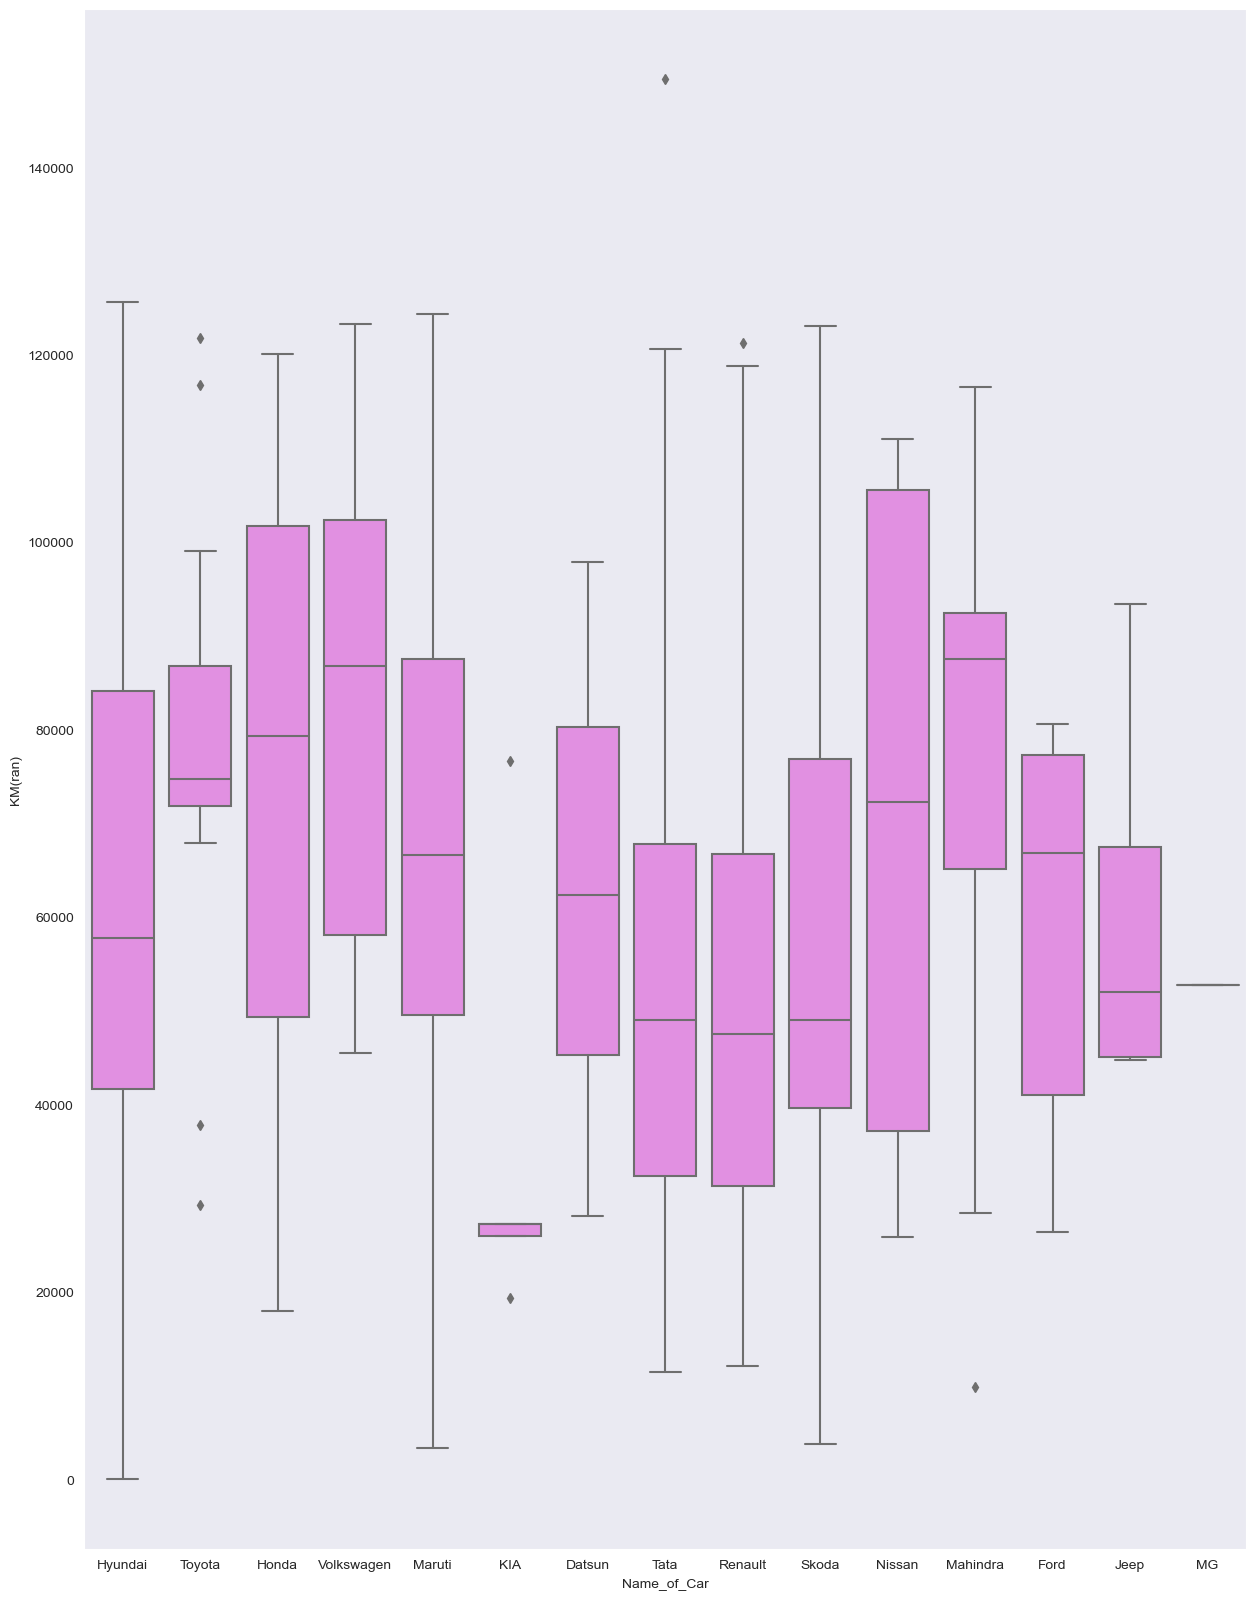

In [17]:
plt.figure(figsize=(15,20))
sns.boxplot(x='Name_of_Car',y='KM(ran)',data=df,color='violet')
plt.show()

In [19]:
df.head()

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Hyundai,961000,879000,Petrol,Manual,2019,28943,1st,4614,175800,Ahmedabad,Medium
1,Hyundai,933000,896000,Petrol,Automatic,2016,52287,1st,9666,179200,Ahmedabad,Medium
2,Toyota,418000,388000,Diesel,Manual,2015,99046,2nd,5713,77600,Ahmedabad,Low
3,Honda,766000,697000,Petrol,Manual,2017,104509,1st,4254,139400,Ahmedabad,Medium
4,Hyundai,590000,579000,Diesel,Manual,2016,52228,2nd,3771,115800,Ahmedabad,Medium


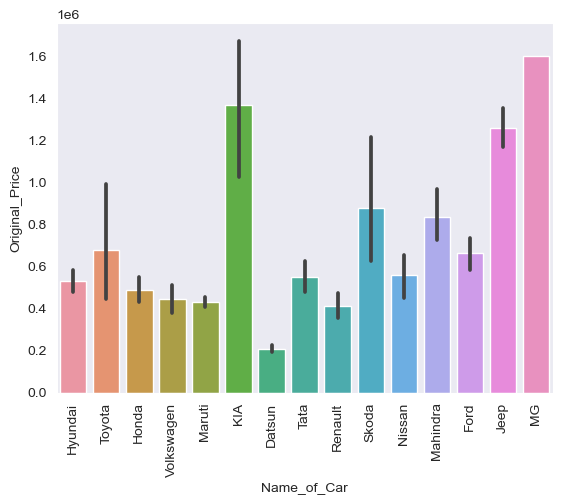

In [21]:
sns.barplot(x="Name_of_Car",y="Original_Price",data=df)
plt.xticks(rotation=90)
plt.show()

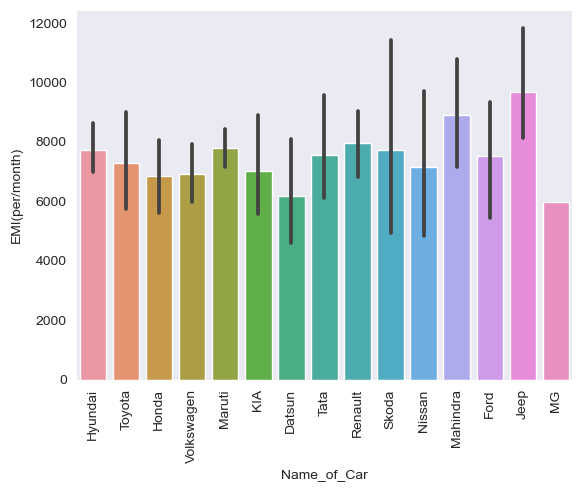

In [22]:
sns.barplot(x="Name_of_Car",y="EMI(per/month)",data=df)
plt.xticks(rotation=90)
plt.show()

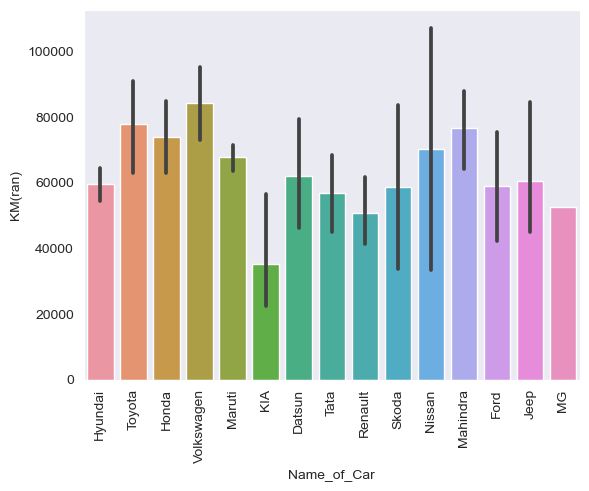

In [23]:
sns.barplot(x="Name_of_Car",y="KM(ran)",data=df)
plt.xticks(rotation=90)
plt.show()

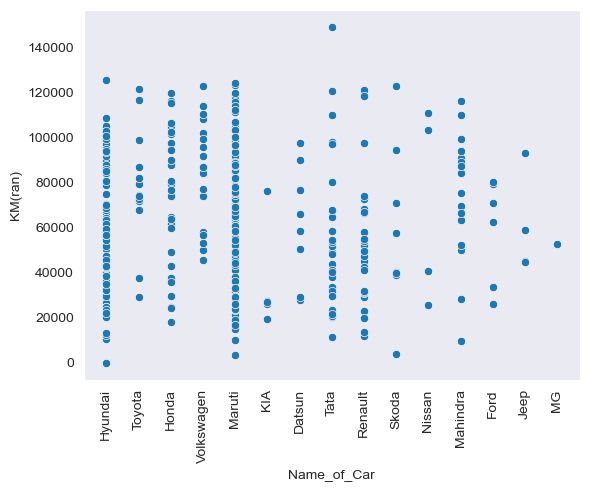

In [24]:
sns.scatterplot(x="Name_of_Car",y="KM(ran)",data=df)
plt.xticks(rotation=90)
plt.show()

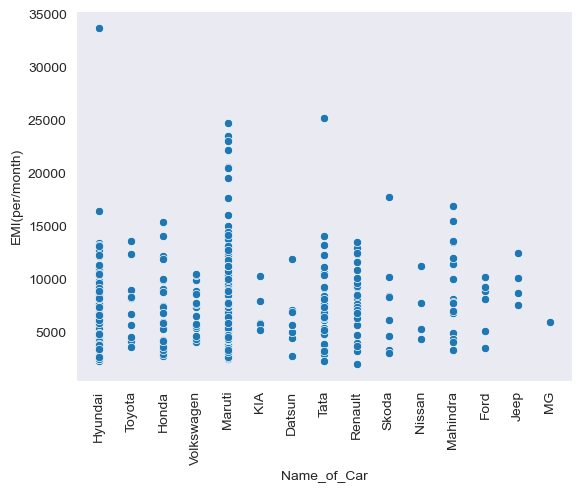

In [25]:
sns.scatterplot(x="Name_of_Car",y="EMI(per/month)",data=df)
plt.xticks(rotation=90)
plt.show()

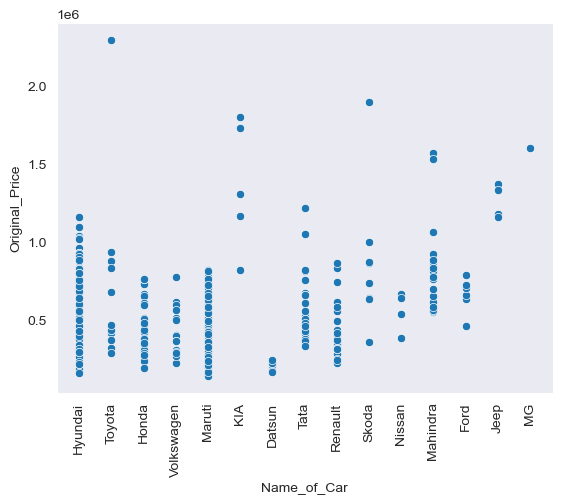

In [26]:
sns.scatterplot(x="Name_of_Car",y="Original_Price",data=df)
plt.xticks(rotation=90)
plt.show()

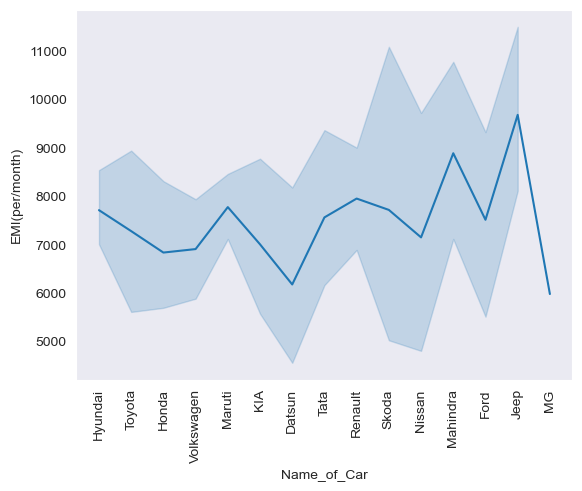

In [27]:
sns.lineplot(x="Name_of_Car",y="EMI(per/month)",data=df)
plt.xticks(rotation=90)
plt.show()

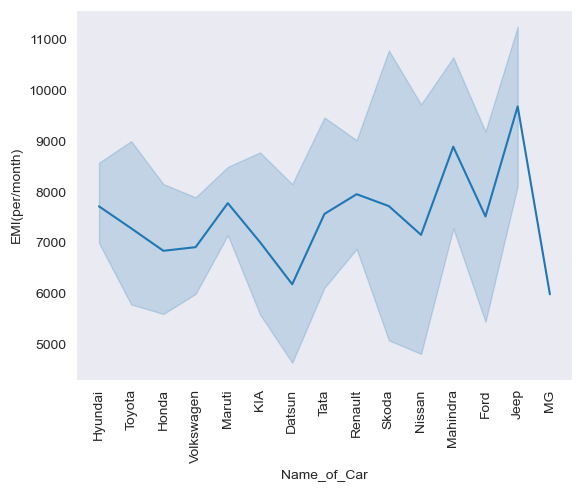

In [29]:
sns.lineplot(x="Name_of_Car",y="EMI(per/month)",data=df)
plt.xticks(rotation=90)
plt.show()

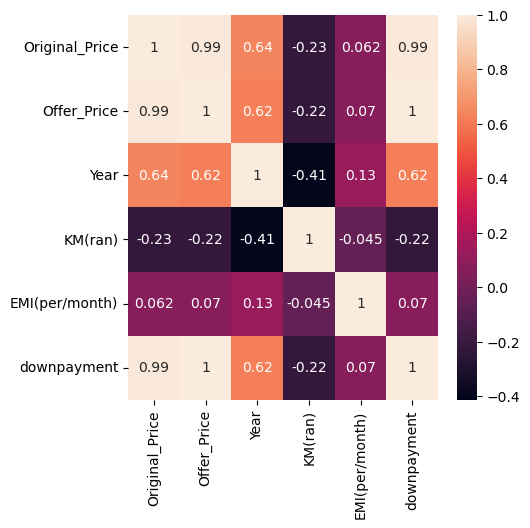

In [9]:
plt.figure(figsize=(5,5))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

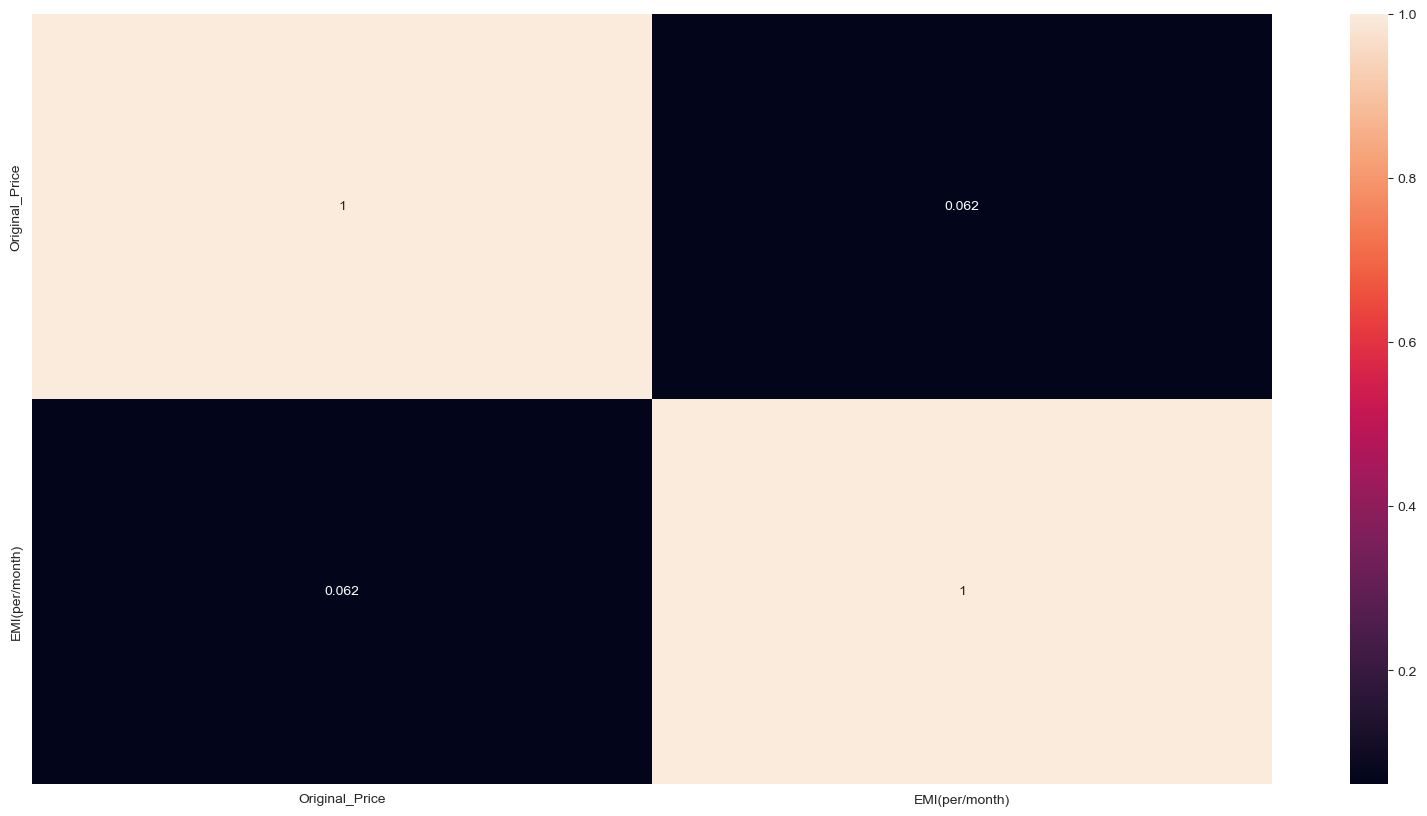

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df[["Original_Price","EMI(per/month)"]].corr(),annot=True)
plt.show()

In [38]:
df

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Hyundai,961000,879000,Petrol,Manual,2019,28943,1st,4614,175800,Ahmedabad,Medium
1,Hyundai,933000,896000,Petrol,Automatic,2016,52287,1st,9666,179200,Ahmedabad,Medium
2,Toyota,418000,388000,Diesel,Manual,2015,99046,2nd,5713,77600,Ahmedabad,Low
3,Honda,766000,697000,Petrol,Manual,2017,104509,1st,4254,139400,Ahmedabad,Medium
4,Hyundai,590000,579000,Diesel,Manual,2016,52228,2nd,3771,115800,Ahmedabad,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
435,Maruti,210000,210000,Petrol,Manual,2012,58638,2nd,3284,42000,Vadodara,Low
436,Volkswagen,501000,488000,Petrol,Manual,2018,53188,1st,10510,97600,Vadodara,Medium
437,Hyundai,298000,292000,Petrol,Manual,2017,86094,1st,8852,58400,Vadodara,Low
438,Maruti,240000,234000,Petrol,Manual,2013,25961,1st,5896,46800,Vadodara,Low


In [59]:
#my=df[(df["EMI(per/month)"]<5000) & (df["Original_Price"]<500000) & (df["car_type"].isin(["1st","2nd"])) & (df["KM(ran)"]<50000)].reset_index(drop=True)

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Hyundai,433000,422000,Petrol,Manual,2014,42242,2nd,4426,84400,Hyderabad,Low
1,Maruti,484000,439000,Petrol,Automatic,2019,10289,2nd,3879,87800,LasudiaMori,Low
2,Maruti,302000,302000,Petrol,Manual,2015,31355,1st,2893,60400,Kolkata,Low
3,Datsun,181000,175000,Petrol,Manual,2016,28130,1st,4989,35000,Kolkata,Low
4,Tata,336000,305000,Diesel,Manual,2017,48548,1st,3284,61000,Kolkata,Low
5,Maruti,201000,174000,Petrol,Manual,2013,47619,1st,3269,34800,Kolkata,Low
6,Renault,432000,376000,Petrol,Manual,2020,19715,2nd,4770,75200,Kolkata,Low
7,Maruti,252000,229000,Petrol,Manual,2012,41353,1st,4989,45800,Lucknow,Low
8,Renault,231000,231000,Petrol,Manual,2018,13597,1st,3613,46200,Agra,Low
9,Hyundai,181000,181000,Petrol,Manual,2011,40596,1st,2831,36200,Agra,Low


In [62]:
sum((df["EMI(per/month)"]<5000) & (df["Original_Price"]<500000) & (df["car_type"].isin(["1st","2nd"])) & (df["KM(ran)"]<50000) &
    \
(df["downpayment"]<50000))

10

In [65]:
my=df[(df["EMI(per/month)"]<5000) & (df["Original_Price"]<500000) & (df["car_type"].isin(["1st","2nd"])) & (df["KM(ran)"]<50000) &
    \
(df["downpayment"]<50000)].reset_index(drop=True)

In [66]:
my

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Datsun,181000,175000,Petrol,Manual,2016,28130,1st,4989,35000,Kolkata,Low
1,Maruti,201000,174000,Petrol,Manual,2013,47619,1st,3269,34800,Kolkata,Low
2,Maruti,252000,229000,Petrol,Manual,2012,41353,1st,4989,45800,Lucknow,Low
3,Renault,231000,231000,Petrol,Manual,2018,13597,1st,3613,46200,Agra,Low
4,Hyundai,181000,181000,Petrol,Manual,2011,40596,1st,2831,36200,Agra,Low
5,Maruti,276000,236000,Petrol,Manual,2015,46785,2nd,2737,47200,Chandigarh,Low
6,Maruti,161000,156000,Petrol,Manual,2011,29904,2nd,2690,31200,Nagpur,Low
7,Honda,280000,240000,Petrol,Manual,2013,35781,2nd,3832,48000,Nasik,Low
8,Maruti,197000,191000,Petrol,Manual,2013,49159,1st,4223,38200,Patna,Low
9,Renault,246000,238000,Petrol,Manual,2016,19712,1st,3722,47600,Surat,Low


In [67]:
my.to_csv("budget_low",index=False)

In [4]:
my=pd.read_csv("budget_low")

In [5]:
my

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Datsun,181000,175000,Petrol,Manual,2016,28130,1st,4989,35000,Kolkata,Low
1,Maruti,201000,174000,Petrol,Manual,2013,47619,1st,3269,34800,Kolkata,Low
2,Maruti,252000,229000,Petrol,Manual,2012,41353,1st,4989,45800,Lucknow,Low
3,Renault,231000,231000,Petrol,Manual,2018,13597,1st,3613,46200,Agra,Low
4,Hyundai,181000,181000,Petrol,Manual,2011,40596,1st,2831,36200,Agra,Low
5,Maruti,276000,236000,Petrol,Manual,2015,46785,2nd,2737,47200,Chandigarh,Low
6,Maruti,161000,156000,Petrol,Manual,2011,29904,2nd,2690,31200,Nagpur,Low
7,Honda,280000,240000,Petrol,Manual,2013,35781,2nd,3832,48000,Nasik,Low
8,Maruti,197000,191000,Petrol,Manual,2013,49159,1st,4223,38200,Patna,Low
9,Renault,246000,238000,Petrol,Manual,2016,19712,1st,3722,47600,Surat,Low


In [71]:
my

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Datsun,181000,175000,Petrol,Manual,2016,28130,1st,4989,35000,Kolkata,Low
1,Maruti,201000,174000,Petrol,Manual,2013,47619,1st,3269,34800,Kolkata,Low
2,Maruti,252000,229000,Petrol,Manual,2012,41353,1st,4989,45800,Lucknow,Low
3,Renault,231000,231000,Petrol,Manual,2018,13597,1st,3613,46200,Agra,Low
4,Hyundai,181000,181000,Petrol,Manual,2011,40596,1st,2831,36200,Agra,Low
5,Maruti,276000,236000,Petrol,Manual,2015,46785,2nd,2737,47200,Chandigarh,Low
6,Maruti,161000,156000,Petrol,Manual,2011,29904,2nd,2690,31200,Nagpur,Low
7,Honda,280000,240000,Petrol,Manual,2013,35781,2nd,3832,48000,Nasik,Low
8,Maruti,197000,191000,Petrol,Manual,2013,49159,1st,4223,38200,Patna,Low
9,Renault,246000,238000,Petrol,Manual,2016,19712,1st,3722,47600,Surat,Low


In [72]:
my["Name_of_Car"].value_counts()

Maruti     5
Renault    2
Datsun     1
Hyundai    1
Honda      1
Name: Name_of_Car, dtype: int64

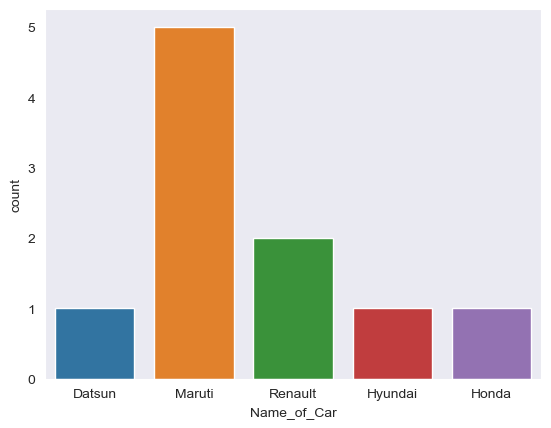

In [74]:
sns.countplot(data=my,x=my["Name_of_Car"])
plt.show()

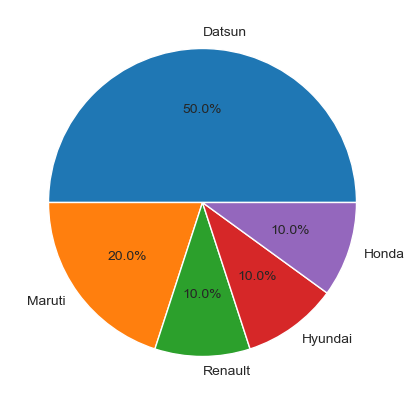

In [80]:
plt.figure(figsize=(5,5))
plt.pie(x=my["Name_of_Car"].value_counts(),labels=my["Name_of_Car"].unique(),autopct='%.1f%%')
plt.show()

In [81]:
my

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Datsun,181000,175000,Petrol,Manual,2016,28130,1st,4989,35000,Kolkata,Low
1,Maruti,201000,174000,Petrol,Manual,2013,47619,1st,3269,34800,Kolkata,Low
2,Maruti,252000,229000,Petrol,Manual,2012,41353,1st,4989,45800,Lucknow,Low
3,Renault,231000,231000,Petrol,Manual,2018,13597,1st,3613,46200,Agra,Low
4,Hyundai,181000,181000,Petrol,Manual,2011,40596,1st,2831,36200,Agra,Low
5,Maruti,276000,236000,Petrol,Manual,2015,46785,2nd,2737,47200,Chandigarh,Low
6,Maruti,161000,156000,Petrol,Manual,2011,29904,2nd,2690,31200,Nagpur,Low
7,Honda,280000,240000,Petrol,Manual,2013,35781,2nd,3832,48000,Nasik,Low
8,Maruti,197000,191000,Petrol,Manual,2013,49159,1st,4223,38200,Patna,Low
9,Renault,246000,238000,Petrol,Manual,2016,19712,1st,3722,47600,Surat,Low


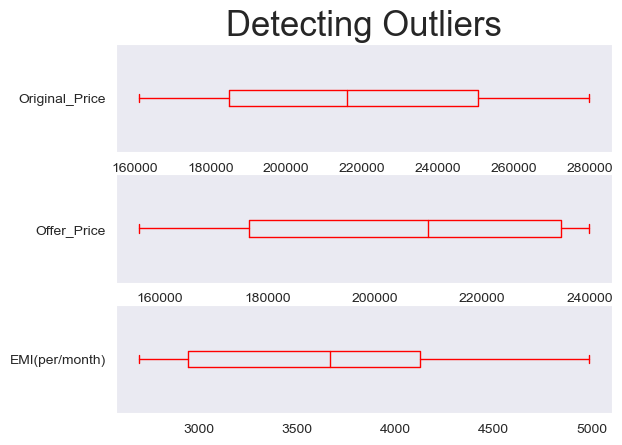

In [83]:
plt.subplot(3,1,1)
my["Original_Price"].plot(kind='box',color='red',vert=False)
plt.title('Detecting Outliers', fontsize=25)

plt.subplot(3,1,2)
my["Offer_Price"].plot(kind='box',color='red',vert=False)

plt.subplot(3,1,3)
my["EMI(per/month)"].plot(kind='box',color='red',vert=False)

plt.show()

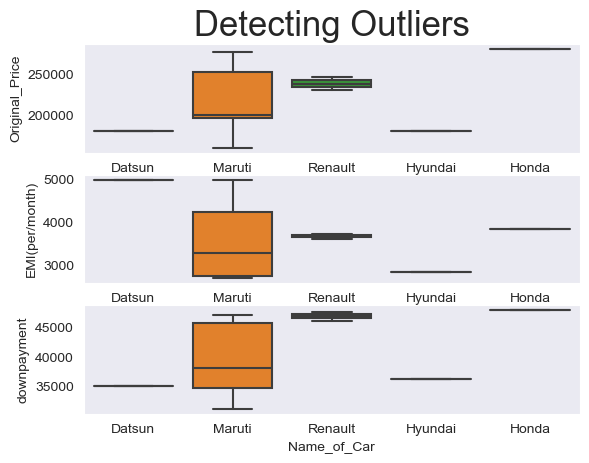

In [87]:
plt.subplot(3,1,1)
sns.boxplot(data=my,x="Name_of_Car",y="Original_Price")
plt.title('Detecting Outliers', fontsize=25)

plt.subplot(3,1,2)
sns.boxplot(data=my,x="Name_of_Car",y="EMI(per/month)")

plt.subplot(3,1,3)
sns.boxplot(data=my,x="Name_of_Car",y="downpayment")

plt.show()

In [6]:
my

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Datsun,181000,175000,Petrol,Manual,2016,28130,1st,4989,35000,Kolkata,Low
1,Maruti,201000,174000,Petrol,Manual,2013,47619,1st,3269,34800,Kolkata,Low
2,Maruti,252000,229000,Petrol,Manual,2012,41353,1st,4989,45800,Lucknow,Low
3,Renault,231000,231000,Petrol,Manual,2018,13597,1st,3613,46200,Agra,Low
4,Hyundai,181000,181000,Petrol,Manual,2011,40596,1st,2831,36200,Agra,Low
5,Maruti,276000,236000,Petrol,Manual,2015,46785,2nd,2737,47200,Chandigarh,Low
6,Maruti,161000,156000,Petrol,Manual,2011,29904,2nd,2690,31200,Nagpur,Low
7,Honda,280000,240000,Petrol,Manual,2013,35781,2nd,3832,48000,Nasik,Low
8,Maruti,197000,191000,Petrol,Manual,2013,49159,1st,4223,38200,Patna,Low
9,Renault,246000,238000,Petrol,Manual,2016,19712,1st,3722,47600,Surat,Low


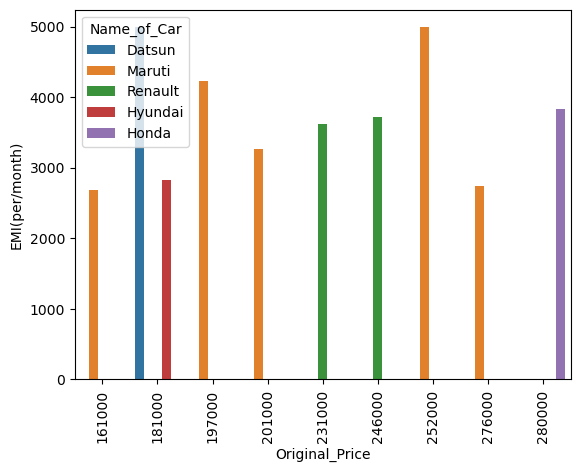

In [21]:
sns.barplot(data=my,x="Original_Price",y="EMI(per/month)",hue="Name_of_Car")
plt.xticks(rotation=90)
plt.show()

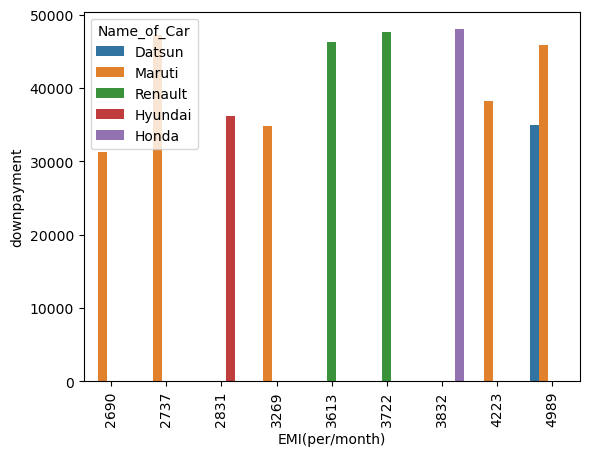

In [23]:
sns.barplot(data=my,x="EMI(per/month)",y="downpayment",hue="Name_of_Car")
plt.xticks(rotation=90)
plt.show()

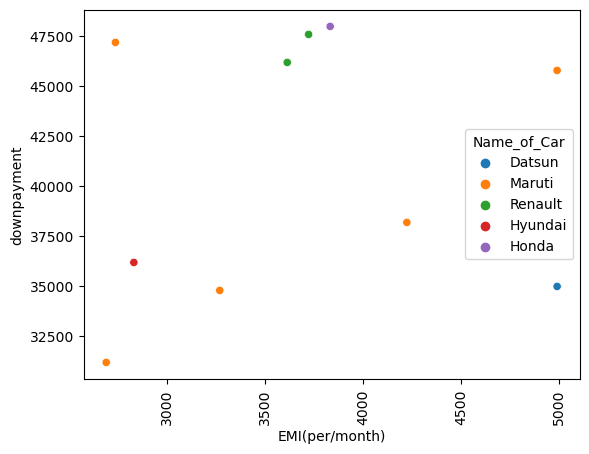

In [27]:
sns.scatterplot(data=my,x="EMI(per/month)",y="downpayment",hue="Name_of_Car")
plt.xticks(rotation=90)
plt.show()

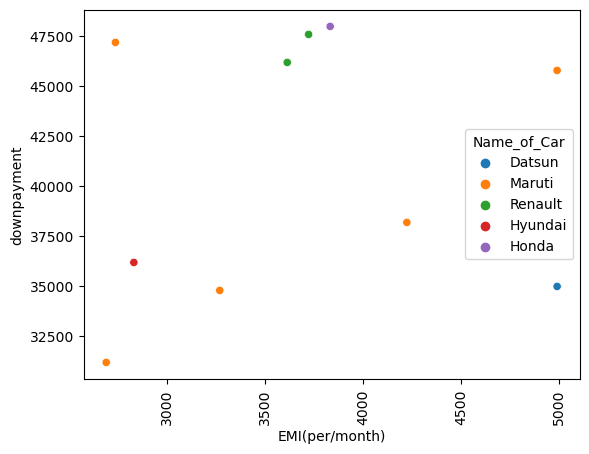

In [32]:
sns.scatterplot(data=my,x="EMI(per/month)",y="downpayment",hue="Name_of_Car")
plt.xticks(rotation=90)
plt.show()

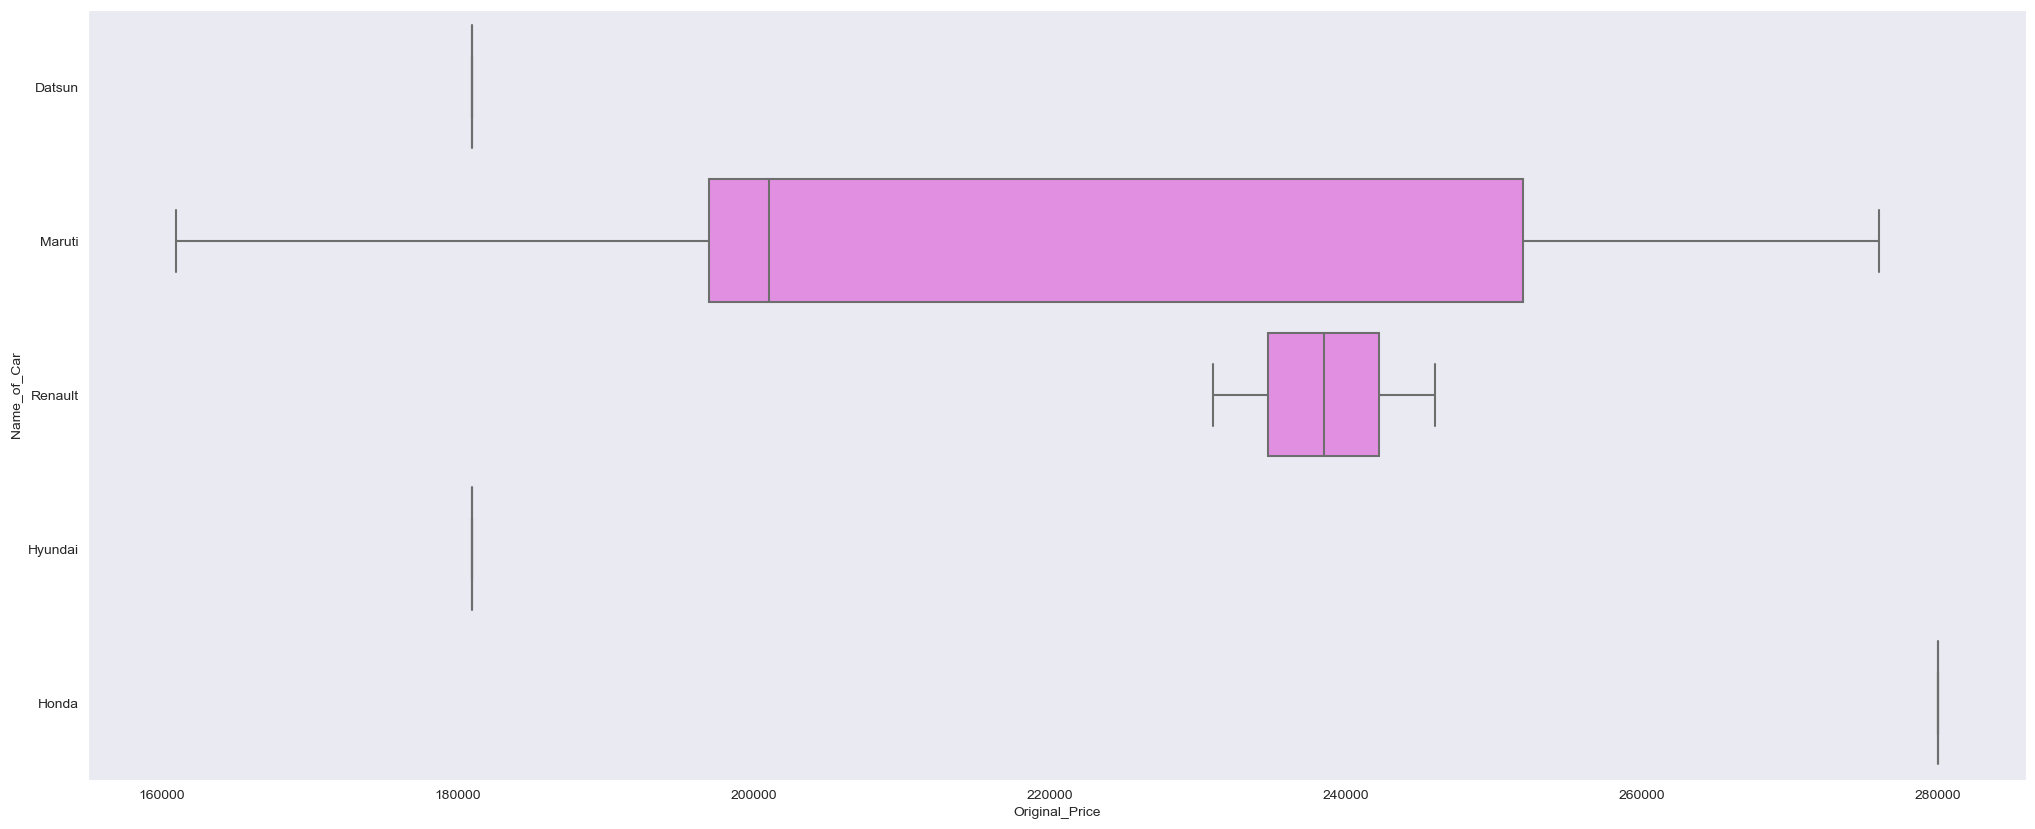

In [34]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Original_Price',y='Name_of_Car',data=my,color='violet')
plt.show()

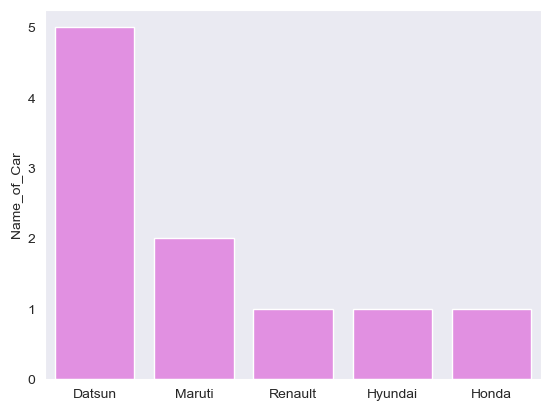

In [45]:
sns.barplot(y=my["Name_of_Car"].value_counts(),x=my["Name_of_Car"].unique(),data=my,color='violet')
plt.show()

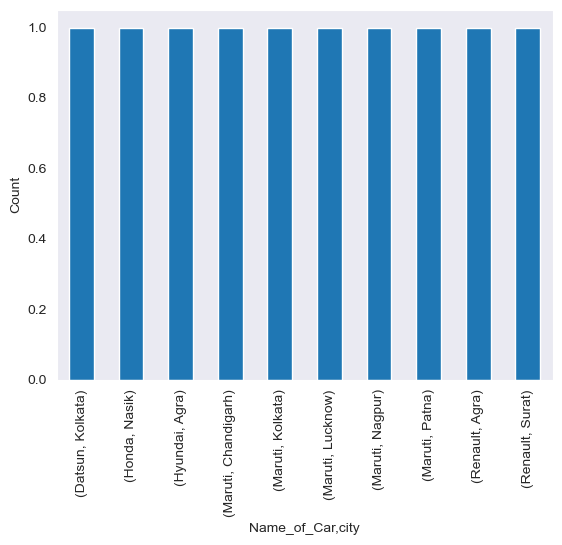

In [53]:
my.groupby("Name_of_Car")["city"].value_counts().plot(kind="bar")
plt.ylabel("Count")
plt.show()

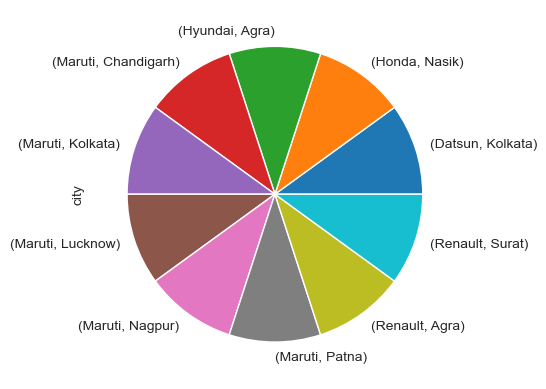

In [57]:
my.groupby("Name_of_Car")["city"].value_counts().plot(kind="pie")

plt.show()

In [58]:
my

,Name_of_Car,Original_Price,Offer_Price,Type_of_Fuel,Ride,Year,KM(ran),car_type,EMI(per/month),downpayment,city,Price_level
0,Datsun,181000,175000,Petrol,Manual,2016,28130,1st,4989,35000,Kolkata,Low
1,Maruti,201000,174000,Petrol,Manual,2013,47619,1st,3269,34800,Kolkata,Low
2,Maruti,252000,229000,Petrol,Manual,2012,41353,1st,4989,45800,Lucknow,Low
3,Renault,231000,231000,Petrol,Manual,2018,13597,1st,3613,46200,Agra,Low
4,Hyundai,181000,181000,Petrol,Manual,2011,40596,1st,2831,36200,Agra,Low
5,Maruti,276000,236000,Petrol,Manual,2015,46785,2nd,2737,47200,Chandigarh,Low
6,Maruti,161000,156000,Petrol,Manual,2011,29904,2nd,2690,31200,Nagpur,Low
7,Honda,280000,240000,Petrol,Manual,2013,35781,2nd,3832,48000,Nasik,Low
8,Maruti,197000,191000,Petrol,Manual,2013,49159,1st,4223,38200,Patna,Low
9,Renault,246000,238000,Petrol,Manual,2016,19712,1st,3722,47600,Surat,Low


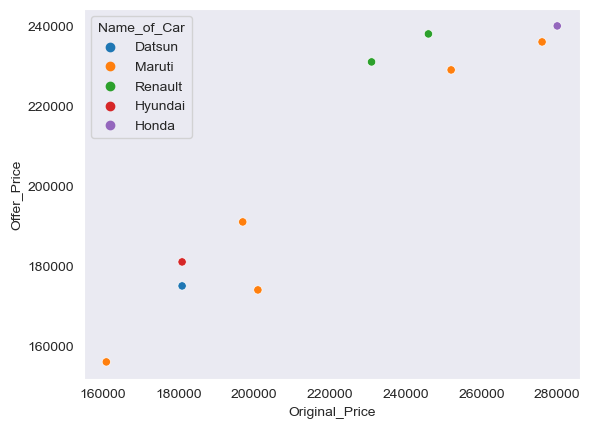

In [60]:
sns.scatterplot(data=my,x="Original_Price",y="Offer_Price",hue="Name_of_Car")
plt.show()

In [62]:
my["Original_Price"].corr(my["Offer_Price"])

0.943353124133094

In [63]:
my["Original_Price"].corr(my["EMI(per/month)"])

0.10635803122249102

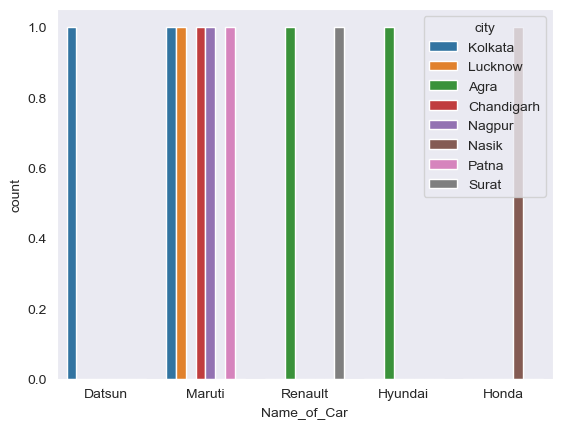

In [65]:
sns.countplot(x='Name_of_Car',hue='city', data=my)
plt.show()